<a href="https://colab.research.google.com/github/MujeebDawar/ComputerVisionTask/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**numpy:** Used for numerical operations, particularly array manipulations.

**PIL (Image):** The Python Imaging Library (Pillow) is used to open and manipulate image files.

**matplotlib.pyplot:** Used for plotting images and displaying the results.

**BytesIO:** Allows working with binary data (used here for handling the uploaded image file).

**ipywidgets and IPython.display:** Provide interactive widgets for Jupyter notebooks,file upload widgets.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
from IPython.display import display
import ipywidgets as widgets

**Step 2: Bilinear Interpolation Function**


*  This function resizes an image using bilinear interpolation.

*   It calculates the corresponding pixel positions in the original image and interpolates new pixel values for the resized image.



* For each pixel in the target image, it finds the four nearest pixels in the original image and computes a weighted average based on their positions.



In [2]:
def bilinear_interpolation(image, target_width, target_height):
    """ Resize an image using bilinear interpolation. """
    src_height, src_width = image.shape[:2]
    resized_image = np.zeros((target_height, target_width, 3), dtype=np.uint8)

    # Calculate the scaling factors
    scale_x = src_width / target_width
    scale_y = src_height / target_height

    for y in range(target_height):
        for x in range(target_width):
            # Find the coordinates of the source pixels
            src_x = x * scale_x
            src_y = y * scale_y

            x0 = int(src_x)
            x1 = min(x0 + 1, src_width - 1)
            y0 = int(src_y)
            y1 = min(y0 + 1, src_height - 1)

            # Compute the fractional parts
            dx = src_x - x0
            dy = src_y - y0

            # Perform the bilinear interpolation
            top_left = image[y0, x0]
            top_right = image[y0, x1]
            bottom_left = image[y1, x0]
            bottom_right = image[y1, x1]

            top = top_left * (1 - dx) + top_right * dx
            bottom = bottom_left * (1 - dx) + bottom_right * dx
            pixel_value = top * (1 - dy) + bottom * dy

            # Set the pixel value in the resized image
            resized_image[y, x] = pixel_value

    return resized_image



**Step 3: Image Resizing Function**
* This function resizes the image based on the original and target DPI (dots per inch).
* It calculates a scaling factor to determine the target width and height.
* It then calls the **bilinear_interpolation** function to perform the actual resizing.

In [3]:
def resize_image(image_array, original_dpi, target_dpi):
    """ Resize an image array based on the target DPI. """
    # Calculate the scaling factor for width and height
    scale_factor = target_dpi / original_dpi
    target_width = int(image_array.shape[1] * scale_factor)
    target_height = int(image_array.shape[0] * scale_factor)

    # Resize the image using bilinear interpolation
    resized_array = bilinear_interpolation(image_array, target_width, target_height)

    return resized_array


**Step 4: Global Variable Initialization**
* Initializes a global variable to store the uploaded image. This allows different functions to access and manipulate the uploaded image.

In [4]:
# Initialize a global variable for the uploaded image
uploaded_image = None

**Step 5: Image Upload Function**

* This function creates a file upload widget using ipywidgets.
* It allows the user to upload a single image file.
Once the image is uploaded, the on_upload_change function converts the *uploaded image content into a NumPy array and stores it in the uploaded_image global variable.
*upload_widget.observe registers the on_upload_change function to be called when a file is uploaded.

In [5]:
def upload_image():
    """ Upload an image file and store it globally. """
    upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
    display(upload_widget)

    def on_upload_change(change):
        global uploaded_image
        file_content = list(upload_widget.value.values())[0]['content']
        image = Image.open(BytesIO(file_content)).convert("RGB")
        uploaded_image = np.array(image)
        print("Image uploaded successfully!")
        upload_widget.close()  # Hide the widget after upload

    upload_widget.observe(on_upload_change, names='value')


**Step 6: Display the File Upload Widget**
* Calls the upload_image() function to display the file upload widget so that the user can upload an image.

In [19]:
# Display the file upload widget
upload_image()

FileUpload(value={}, accept='image/*', description='Upload')

Image uploaded successfully!


In [20]:
# Define a function to process and display images
def process_and_display_images():
    global uploaded_image
    if uploaded_image is None:
        print("Please upload an image before processing.")
        return

**Step 7: Function to Process and Display Images**
* This function processes the uploaded image by first shrinking it from 1250 DPI to 100 DPI and then zooming it back to 1250 DPI.
* It uses the resize_image() function to perform these operations.
* It plots the original, shrunk, and zoomed images side by side using matplotlib.

In [21]:
 # Part a: Shrink the image from 1250 dpi to 100 dpi
shrunk_array = resize_image(uploaded_image, original_dpi=1250, target_dpi=100)



In [22]:
   # Part b: Zoom the image back from 100 dpi to 1250 dpi
zoomed_array = resize_image(shrunk_array, original_dpi=100, target_dpi=1250)


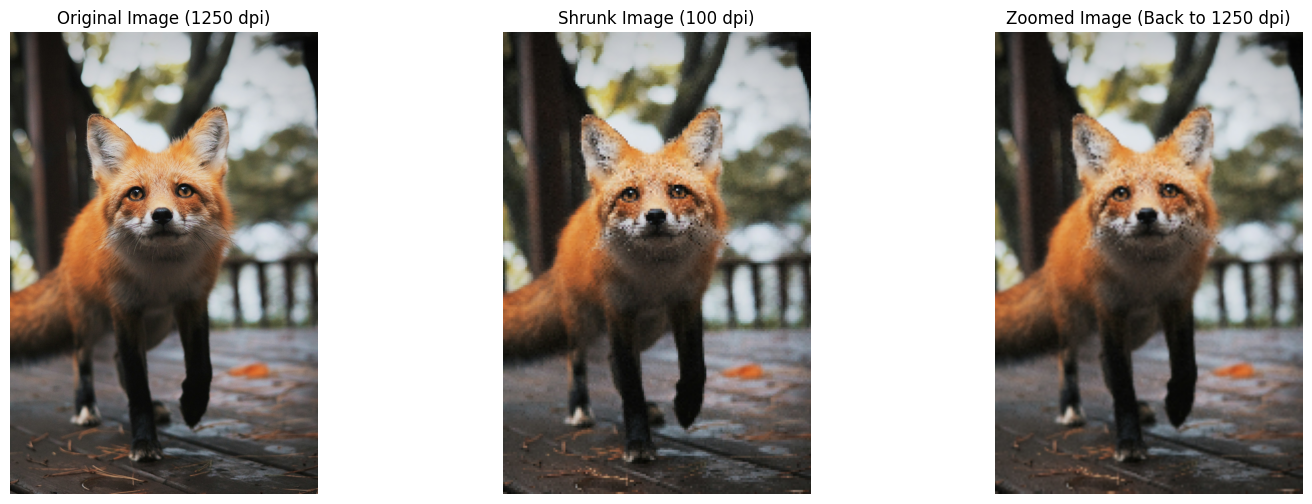

In [23]:
# Plotting the original, shrunk, and zoomed images
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
# Original image
ax[0].imshow(uploaded_image.astype(np.uint8))
ax[0].set_title("Original Image (1250 dpi)")
ax[0].axis("off")
# Shrunk image
ax[1].imshow(shrunk_array)
ax[1].set_title("Shrunk Image (100 dpi)")
ax[1].axis("off")

# Zoomed image
ax[2].imshow(zoomed_array)
ax[2].set_title("Zoomed Image (Back to 1250 dpi)")
ax[2].axis("off")

plt.show()

# **Explanation**


The differences between the original image, the shrunk image, and the zoomed image can be explained by considering the processes involved in shrinking and zooming and how they affect image quality:

# **1. Loss of Detail When Shrinking**
Shrinking an image from 1250 DPI to 100 DPI means reducing the number of pixels, which throws away a lot of the original details.
With fewer pixels, the smaller image can’t capture fine details, sharp edges, or tiny textures as well as the original. This makes the image look more blurred and less defined.
# **2. Blurry Look When Enlarging Again**
When you zoom the 100 DPI image back to 1250 DPI, the software has to "guess" what the extra pixels should look like using a method called bilinear interpolation. This involves averaging nearby pixels to fill in the gaps.
However, since a lot of details were lost during shrinking, the guessed pixels can't bring back the original sharpness and detail, making the enlarged image look softer or blurrier.
# **3. Blurring Due to Interpolation**
Bilinear interpolation is a fast way to enlarge images, but it often causes blurring because it smooths out the details by averaging the colors of nearby pixels.
The original high-resolution image had much crisper details that are difficult to recreate once they’ve been lost.
# **4. Jagged Edges (Aliasing)**
When you reduce the size of an image, it can lead to aliasing, which creates jagged edges or strange patterns, especially in areas with fine textures or lines.
These jagged edges stay in the image even when you zoom back up, making the enlarged image look different from the original.
# **5. Pixelation**
When zooming the shrunken image back up, the original pixel density and details are gone. The new pixels are created based on estimations, not the original information.
This can lead to a pixelated look where areas that used to have fine details now appear blocky or overly smooth.

# **Conclusion:**
When  shrink an image, Image lose important details. Enlarging it again can’t bring back those lost details because the process relies on estimations, which tend to blur sharp features and make the image look less defined. This results in visible differences like blurring, loss of fine details, jagged edges, and pixelation in the zoomed image.